In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [162]:
df = pd.read_csv('Salary.csv')

# DATA PREPROCESSING

In [163]:
df.head

<bound method NDFrame.head of        Age  Gender  Education Level              Job Title  \
0     32.0    Male                1      Software Engineer   
1     28.0  Female                2           Data Analyst   
2     45.0    Male                3                Manager   
3     36.0  Female                1        Sales Associate   
4     52.0    Male                2               Director   
...    ...     ...              ...                    ...   
6679  49.0  Female                3  Director of Marketing   
6680  32.0    Male                0        Sales Associate   
6681  30.0  Female                1      Financial Manager   
6682  46.0    Male                2      Marketing Manager   
6683  26.0  Female                0        Sales Executive   

      Years of Experience    Salary    Country        Race  Senior  
0                     5.0   90000.0         UK       White       0  
1                     3.0   65000.0        USA    Hispanic       0  
2                 

In [164]:
## Data Understanding
# dataset statistics.
print("X shapes: ", X.shape)
print("y shapes: ", y.shape)
print(df.describe())
print("\n")

# attribute counts and their datatypes.
print(df.info())

X shapes:  (261, 19)
y shapes:  (261,)
               Age  Education Level  Years of Experience         Salary  \
count  6684.000000      6684.000000          6684.000000    6684.000000   
mean     33.610563         1.622382             8.077723  115307.175194   
std       7.595994         0.880474             6.029305   52806.810881   
min      21.000000         0.000000             0.000000     350.000000   
25%      28.000000         1.000000             3.000000   70000.000000   
50%      32.000000         1.000000             7.000000  115000.000000   
75%      38.000000         2.000000            12.000000  160000.000000   
max      62.000000         3.000000            34.000000  250000.000000   

            Senior  
count  6684.000000  
mean      0.143477  
std       0.350585  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 

In [165]:
# unique elements
print("Job titles: ", df['Job Title'].value_counts())
print("Countries: ", df['Country'].value_counts())
print("Races: ", df['Race'].value_counts())

Job titles:  Job Title
Software Engineer                 809
Data Scientist                    515
Data Analyst                      391
Software Engineer Manager         376
Product Manager                   323
                                 ... 
Customer Support Specialist         1
VP of Finance                       1
Director of Product Management      1
CEO                                 1
Human Resources Director            1
Name: count, Length: 129, dtype: int64
Countries:  Country
USA          1356
China        1339
Australia    1335
UK           1332
Canada       1322
Name: count, dtype: int64
Races:  Race
White               1957
Asian               1599
Korean               457
Australian           452
Chinese              443
Black                435
African American     352
Mixed                334
Welsh                333
Hispanic             322
Name: count, dtype: int64


In [166]:
# broaden categories
categories = {
    # technology
    'Software Engineer': 'Technology',
    'Data Analyst': 'Technology',
    'Web Developer': 'Technology',
    'Software Manager': 'Technology',
    'Data Engineer': 'Technology',
    'Full Stack Engineer': 'Technology',
    'Software Architect': 'Technology',
    'Software Developer': 'Technology',
    'Software Engineer Manager': 'Technology',
    'Front End Developer': 'Technology',
    'Front end Developer': 'Technology',
    'Back end Developer': 'Technology',
    'Network Engineer': 'Technology',
    'Developer': 'Technology',
    'Director of Engineering': 'Technology',
    'Engineer': 'Technology',
    'Project Engineer': 'Technology',
    'Principal Engineer': 'Technology',
    'Software Project Manager': 'Technology',

    # business
    'Sales Associate': 'Business',
    'Marketing Analyst': 'Business',
    'Marketing Coordinator': 'Business',
    'Financial Analyst': 'Business',
    'Marketing Manager': 'Business',
    'Sales Director': 'Business',
    'Business Analyst': 'Business',
    'Financial Manager': 'Business',
    'Consultant': 'Business',
    'Account Manager': 'Business',
    'Account Executive': 'Business',
    'Customer Success Manager': 'Business',
    'Business Development Manager': 'Business',
    'Business Operations Analyst': 'Business',
    'Strategy Consultant': 'Business',
    'Accountant': 'Business',
    'Business Development Associate': 'Business',
    'Business Intelligence Analyst': 'Business',
    'Content Marketing Manager': 'Business',
    'Digital Marketing Manager': 'Business',
    'Digital Marketing Specialist': 'Business',
    'Director of Business Development': 'Business',
    'Director of Finance': 'Business',
    'Director of Marketing': 'Business',
    'Director of Product Management': 'Business',
    'Director of Sales': 'Business',
    'Director of Sales and Marketing': 'Business',
    'Financial Advisor': 'Business',
    'Marketing Director': 'Business',
    'Marketing Specialist': 'Business',
    'Product Marketing Manager': 'Business',
    'Quality Assurance Analyst': 'Business',
    'Sales Associate': 'Business',
    'Sales Executive': 'Business',
    'Sales Manager': 'Business',
    'Sales Operations Manager': 'Business',
    'Sales Representative': 'Business',
    'Supply Chain Analyst': 'Business',
    'Supply Chain Manager': 'Business',
    'VP of Finance': 'Business',
    'Product Development Manager': 'Business',

    # human resources
    'HR Manager': 'Human Resources',
    'Customer Service Rep': 'Human Resources',
    'Recruiter': 'Human Resources',
    'HR Generalist': 'Human Resources',
    'HR Coordinator': 'Human Resources',
    'Human Resources Manager': 'Human Resources',
    'HR Specialist': 'Human Resources',
    'Technical Recruiter': 'Human Resources',
    'Administrative Assistant': 'Human Resources',
    'Advertising Coordinator': 'Human Resources',
    'Copywriter': 'Human Resources',
    'Customer Service Manager': 'Human Resources',
    'Customer Service Representative': 'Human Resources',
    'Customer Success Rep': 'Human Resources',
    'Customer Support Specialist': 'Human Resources',
    'Director': 'Human Resources',
    'Director of HR': 'Human Resources',
    'Director of Human Capital': 'Human Resources',
    'Director of Human Resources': 'Human Resources',
    'Director of Operations': 'Human Resources',
    'Event Coordinator': 'Human Resources',
    'Human Resources Coordinator': 'Human Resources',
    'Juniour HR Coordinator': 'Human Resources',
    'Juniour HR Generalist': 'Human Resources',
    'Public Relations Manager': 'Human Resources',
    'Human Resources Specialist': 'Human Resources',
    'Human Resources Director': 'Human Resources',

    # information technology
    'IT Support Specialist': 'Information Technology',
    'Help Desk Analyst': 'Information Technology',
    'IT Project Manager': 'Information Technology',
    'IT Support': 'Information Technology',
    'IT Manager': 'Information Technology',
    'Chief Data Officer': 'Information Technology',
    'Chief Technology Officer': 'Information Technology',
    'IT Consultant': 'Information Technology',
    'Technical Support Specialist': 'Information Technology',

    # social media
    'Social Media Specialist': 'Social Media',
    'Social Media Manager': 'Social Media',
    'Social Media Man': 'Social Media',

    # design
    'Graphic Designer': 'Design',
    'UX Designer': 'Design',
    'Creative Director': 'Design',
    'Digital Content Producer': 'Design',
    'Designer': 'Design',
    'Web Designer': 'Design',
    'Product Designer': 'Design',
    'UX Researcher': 'Design',

    # research and science
    'Data Scientist': 'Research and Science',
    'Research Scientist': 'Research and Science',
    'Principal Scientist': 'Research and Science',
    'Researcher': 'Research and Science',
    'Director of Data Science': 'Research and Science',
    'Research Director': 'Research and Science',
    'Scientist': 'Research and Science',


    # miscellaneous
    'Manager': 'Miscellaneous',
    'Product Manager': 'Miscellaneous',
    'Project Manager': 'Miscellaneous',
    'Operations Manager': 'Miscellaneous',
    'Data Entry Clerk': 'Miscellaneous',
    'VP of Operations': 'Miscellaneous',
    'Operations Director': 'Miscellaneous',
    'CEO': 'Miscellaneous',
    'Delivery Driver': 'Miscellaneous',
    'Office Manager': 'Miscellaneous',
    'Operations Analyst': 'Miscellaneous',
    'Operations Coordinator': 'Miscellaneous',
    'Project Coordinator': 'Miscellaneous',
    'Receptionist': 'Miscellaneous',
    'Technical Writer': 'Miscellaneous',
    'Training Specialist': 'Miscellaneous',

}


# print(df['Job Title'].unique())

for category in categories:
    for i in range(len(df['Job Title'])):
        if category == df['Job Title'][i]:
            df.loc[i, 'Job Title'] = categories[category]

# print(df['Job Title'].unique())

# SPLIT THE DATASET BY COUNTRY

In [167]:
country_groups = df.groupby('Country')

# Dictionary to hold each country's data
country_data = {country: group for country, group in country_groups}

# Display the available countries and sizes of their datasets
for country, group in country_data.items():
    print(f"Country: {country}, Data Points: {len(group)}")

Country: Australia, Data Points: 1335
Country: Canada, Data Points: 1322
Country: China, Data Points: 1339
Country: UK, Data Points: 1332
Country: USA, Data Points: 1356


# ONE HOT ENCODING FOR EACH DATASET

In [168]:
# eliminating columns with strings and the column with the target variable
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
for country, group in country_data.items():
    categorical_columns = group.select_dtypes(include=['object']).columns.tolist()

    # Apply one-hot encoding to the categorical columns
    one_hot_encoded = encoder.fit_transform(group[categorical_columns])

    # Create a DataFrame with the one-hot encoded columns
    one_hot_group = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

    # Concatenate the one-hot encoded dataframe with the original dataframe
    group_encoded = pd.concat([group, one_hot_group], axis=1)

    # Drop the original categorical columns
    group_encoded = group_encoded.drop(categorical_columns, axis=1)

    # Modify the dictionary that holds each country's data
    country_data[country] = group_encoded

# eliminate rows with NaN
for country, group in country_data.items():
    country_data[country] = group.dropna()

# SPLIT DEPENDENT AND INDEPENDENT VARIABLES

In [169]:
# this ensures salary is not modified during feature selection
for country, group in country_data.items():
    X = group.drop(columns=['Salary'])
    y = group['Salary']
    country_data[country] = [X, y]

# syntax for accessing data:
# X = country_data[country][0]
# y = country_data[country][1]

# FEATURE SELECTION

In [170]:
# scale each dataset
scaler = StandardScaler()
for country, group in country_data.items():
    # scale the dataset, keep salary the same
    country_data[country] = [scaler.fit_transform(group[0]), group[1]]

# principal component analysis
print("first principal component analysis: ")
for country, group in country_data.items():
    # initialize PCA
    pca = PCA()

    # perform pca on dataset, keep salary the same
    country_data[country] = [pca.fit_transform(group[0]), group[1]]

    # print results of pca
    print(country)
    print(f"variance ratios: {pca.explained_variance_ratio_}")
    print(f"number of remaining components: {len(pca.explained_variance_ratio_)}")

    # check if the total variance ratio adds up to 1
    total_variance_ratio = 0.0
    for ratio in pca.explained_variance_ratio_:
        total_variance_ratio += ratio
    print(f"total variance ratio: {total_variance_ratio}")
    total_variance_ratio = 0.0
    print()

# some variance ratios are still very close to zero, so manually drop those components

print()
print()
print("second principal component analysis: ")
n = 1
for country, group in country_data.items():
    # manually drop components
    if country == 'Australia':
        n = 12
    elif country == 'Canada' or country == 'China':
        n = 13
    elif country == 'UK' or country == 'USA':
        n = 14

    # initialize PCA
    pca = PCA(n_components=n)

    # perform pca on dataset, keep salary the same
    country_data[country] = [pca.fit_transform(group[0]), group[1]]

    # print results of pca
    print(country)
    print(f"variance ratios: {pca.explained_variance_ratio_}")
    print(f"number of remaining components: {len(pca.explained_variance_ratio_)}")

    # check if the total variance ratio adds up to 1
    total_variance_ratio = 0.0
    for ratio in pca.explained_variance_ratio_:
        total_variance_ratio += ratio
    print(f"total variance ratio: {total_variance_ratio}")
    total_variance_ratio = 0.0
    print()

first principal component analysis: 
Australia
variance ratios: [1.86409898e-01 1.56158048e-01 1.14343172e-01 9.64426901e-02
 8.96549190e-02 7.73724862e-02 7.15419897e-02 6.89330543e-02
 5.92814246e-02 4.37226315e-02 3.17577277e-02 4.38195862e-03
 4.71061517e-18 6.65594242e-33 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
number of remaining components: 18
total variance ratio: 1.0000000000000002

Canada
variance ratios: [1.67902837e-01 1.38969072e-01 1.00303647e-01 9.53864707e-02
 9.06450059e-02 7.44208964e-02 6.64845122e-02 6.43789980e-02
 6.22700220e-02 5.71906469e-02 4.61265091e-02 3.16082201e-02
 4.31316226e-03 4.92790931e-18 3.20627035e-33 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
number of remaining components: 18
total variance ratio: 1.0

China
variance ratios: [1.62658169e-01 1.45568220e-01 1.02360238e-01 9.56149284e-02
 9.04015731e-02 7.45434815e-02 6.72348380e-02 6.55501634e-02
 6.06480116e-02 5.25346409e-02 4.51688069e-02 3.35466881e-02
 4.17024104e-03

# EXPLORATORY DATA ANALYSIS

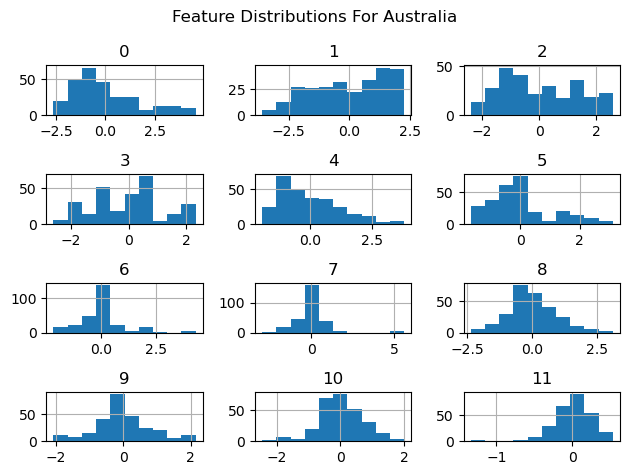

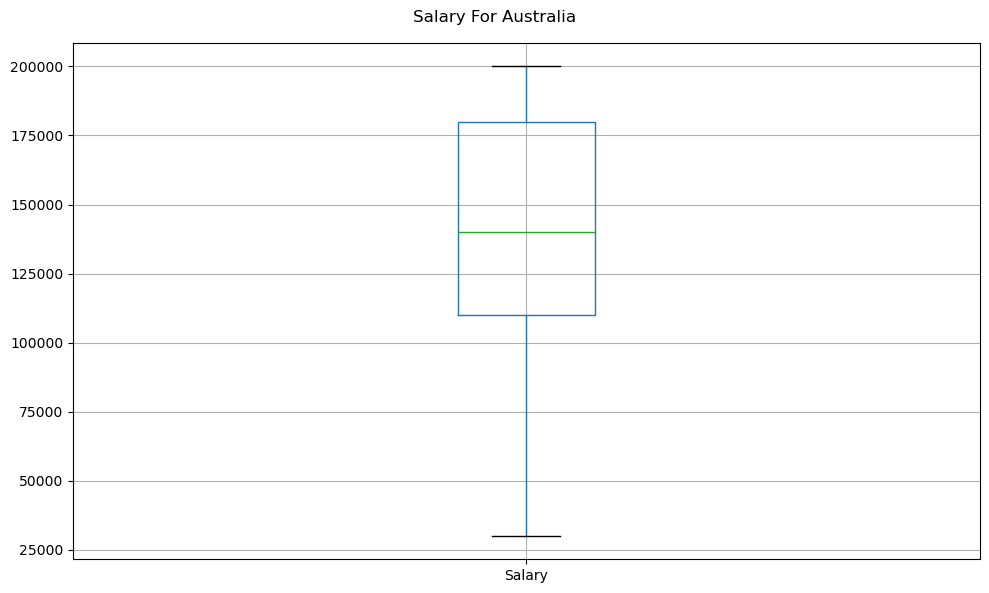

Component 0's lower outliers:
(11,)
Component 4's lower outliers:
(5,)
Component 5's lower outliers:
(28,)
Component 6's lower outliers:
(28,)
Component 6's lower outliers:
(15,)
Component 7's lower outliers:
(5,)
Component 7's lower outliers:
(20,)
Component 8's lower outliers:
(4,)
Component 8's lower outliers:
(3,)
Component 9's lower outliers:
(12,)
Component 9's lower outliers:
(10,)
Component 10's lower outliers:
(3,)
Component 10's lower outliers:
(7,)
Component 11's lower outliers:
(5,)


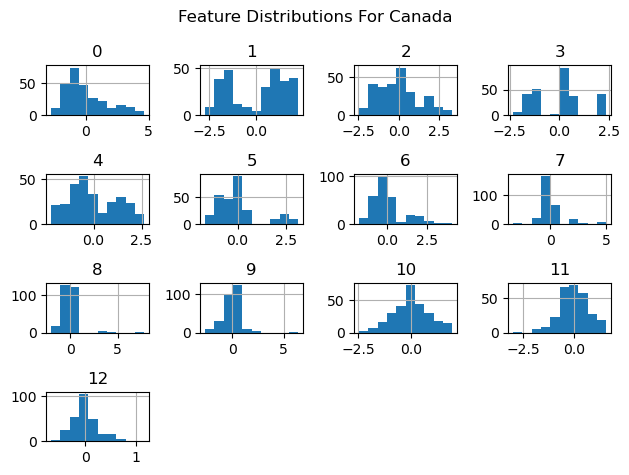

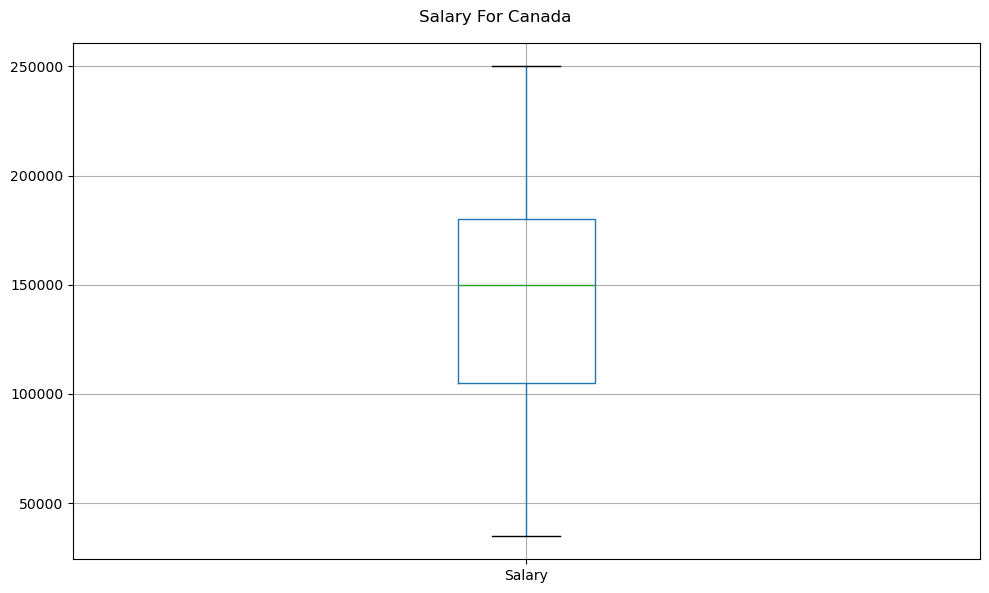

Component 0's lower outliers:
(4,)
Component 5's lower outliers:
(38,)
Component 6's lower outliers:
(33,)
Component 7's lower outliers:
(24,)
Component 7's lower outliers:
(2,)
Component 8's lower outliers:
(8,)
Component 8's lower outliers:
(18,)
Component 9's lower outliers:
(5,)
Component 9's lower outliers:
(5,)
Component 10's lower outliers:
(3,)
Component 11's lower outliers:
(4,)
Component 12's lower outliers:
(7,)
Component 12's lower outliers:
(1,)


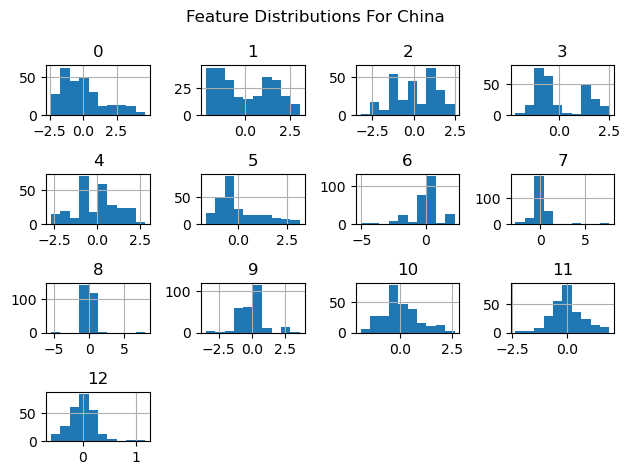

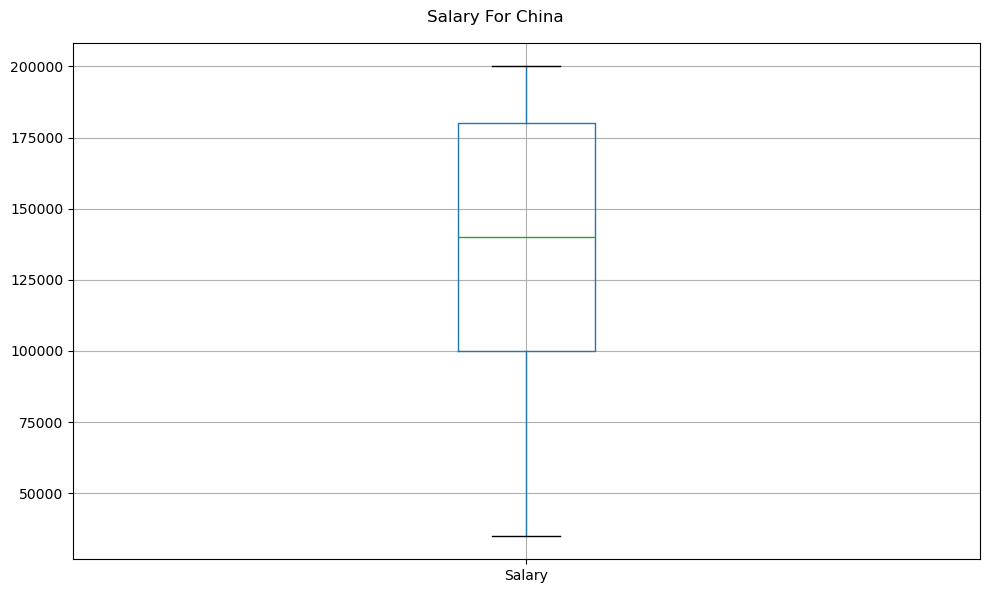

Component 0's lower outliers:
(4,)
Component 5's lower outliers:
(16,)
Component 6's lower outliers:
(25,)
Component 6's lower outliers:
(38,)
Component 7's lower outliers:
(8,)
Component 7's lower outliers:
(21,)
Component 8's lower outliers:
(3,)
Component 8's lower outliers:
(3,)
Component 9's lower outliers:
(14,)
Component 9's lower outliers:
(5,)
Component 10's lower outliers:
(5,)
Component 10's lower outliers:
(1,)
Component 11's lower outliers:
(7,)
Component 11's lower outliers:
(3,)
Component 12's lower outliers:
(6,)
Component 12's lower outliers:
(1,)


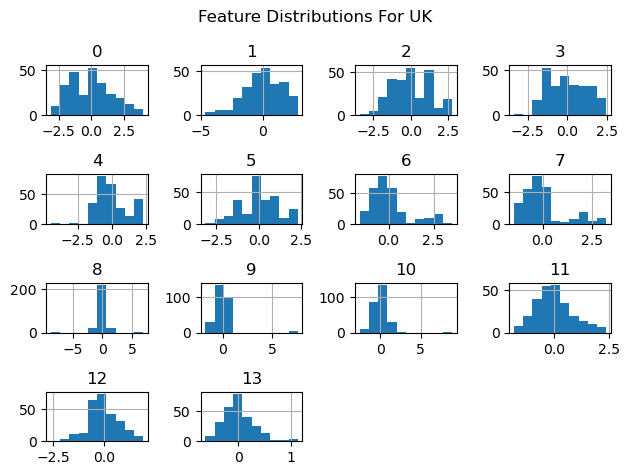

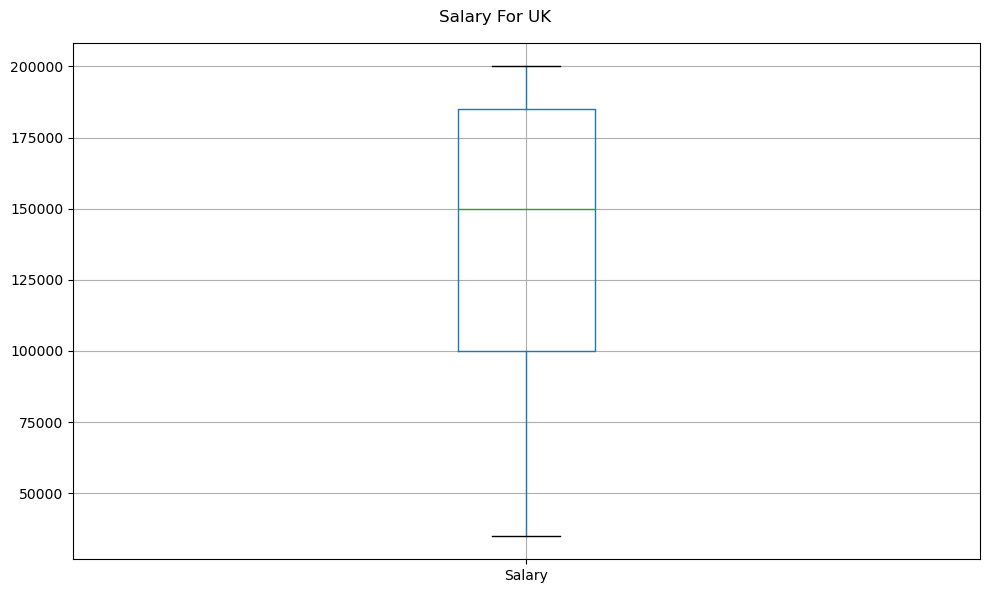

Component 1's lower outliers:
(1,)
Component 4's lower outliers:
(2,)
Component 5's lower outliers:
(1,)
Component 6's lower outliers:
(33,)
Component 7's lower outliers:
(37,)
Component 8's lower outliers:
(16,)
Component 8's lower outliers:
(3,)
Component 9's lower outliers:
(3,)
Component 9's lower outliers:
(5,)
Component 10's lower outliers:
(4,)
Component 10's lower outliers:
(2,)
Component 11's lower outliers:
(7,)
Component 12's lower outliers:
(1,)
Component 12's lower outliers:
(2,)
Component 13's lower outliers:
(6,)


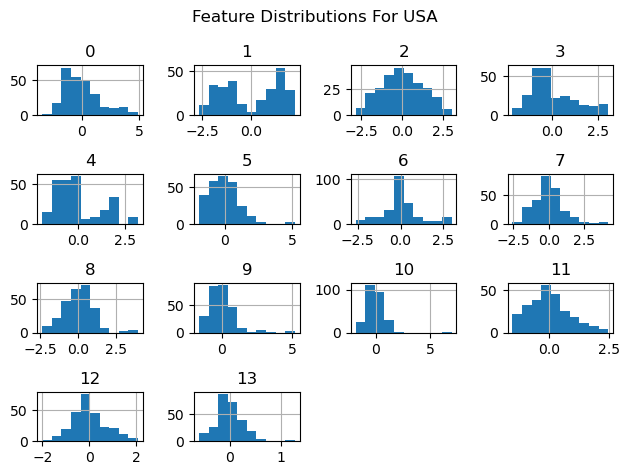

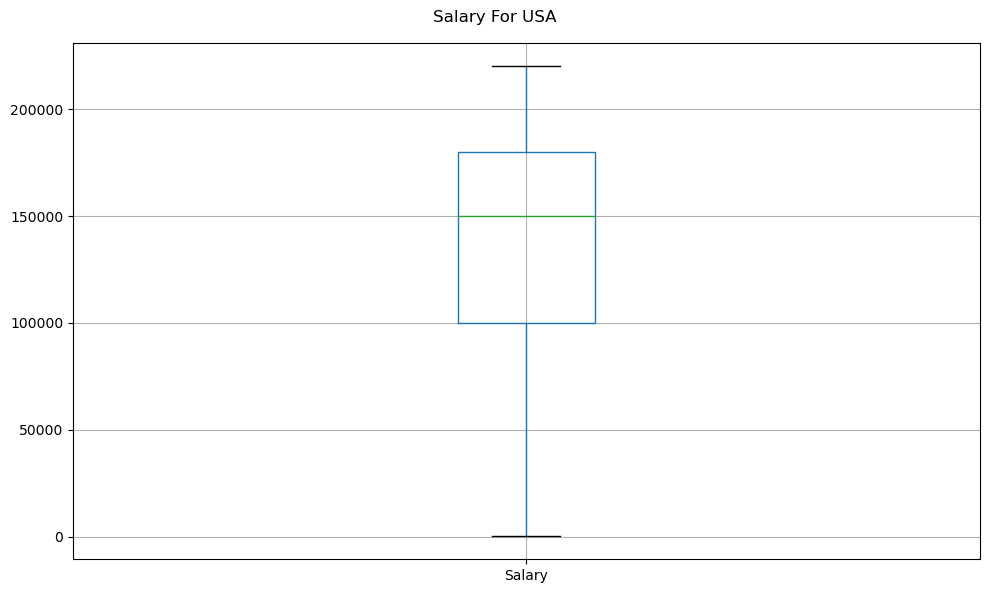

Component 0's lower outliers:
(8,)
Component 5's lower outliers:
(4,)
Component 6's lower outliers:
(20,)
Component 6's lower outliers:
(18,)
Component 7's lower outliers:
(7,)
Component 7's lower outliers:
(1,)
Component 8's lower outliers:
(6,)
Component 8's lower outliers:
(2,)
Component 9's lower outliers:
(8,)
Component 10's lower outliers:
(2,)
Component 11's lower outliers:
(1,)
Component 12's lower outliers:
(8,)
Component 12's lower outliers:
(2,)
Component 13's lower outliers:
(6,)
Component 13's lower outliers:
(1,)


In [171]:
for country, group in country_data.items():
    # histogram distribution
    group_df = pd.DataFrame(group[0])
    group_df.hist()
    plt.suptitle(f"Feature Distributions For {country}")
    plt.tight_layout()
    plt.show()

    # salary graphed in a different graph because it has larger values
    salary = pd.DataFrame(group[1])
    salary.boxplot(figsize=(10, 6))
    plt.suptitle(f"Salary For {country}")
    plt.tight_layout()
    plt.show()

    # find outliers in data (use code from discussion 1)
    col_to_graph =['Age', 'Years of Experience', 'Salary']
    for feature in group_df:  # calculate for each of the identified attributes
        q1 = group_df[feature].quantile(0.25)
        q3 = group_df[feature].quantile(0.75)
        iqr = q3 - q1 #interquartile range: i.e. the box of the boxplot.
        lower_bound = q1 - 1.5 * iqr #lower line.
        upper_bound = q3 + 1.5 * iqr #upper line.
        #modify outliers to values.
        outliers_lower = group_df[feature] < lower_bound
        outliers_upper = group_df[feature] > upper_bound

        # print the outliers
        if outliers_upper.any():
            print(f"Component {feature}'s lower outliers:\n{group_df.loc[outliers_upper, feature].shape}")
        if outliers_lower.any():
            print(f"Component {feature}'s lower outliers:\n{group_df.loc[outliers_lower, feature].shape}")

        group_df.loc[outliers_lower, feature] = lower_bound
        group_df.loc[outliers_upper, feature] = upper_bound

# LINEAR MODEL